<a href="https://colab.research.google.com/github/lamorrison04/Data-Science-Project-2/blob/main/Project2_Laymoni_Morrison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

%precision %.7g
%matplotlib inline

In [ ]:
donut = pd.read_csv('https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv')

donut.head()

,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,NaN,...,19,9,0,0,110,45.0,42,4,26,1.0
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,NaN,...,18,7,0,35,437,49.0,52,4,27,NaN
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,NaN,...,18,8,0,0,165,59.0,44,5,20,1.0
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,NaN,...,17,8,0,0,143,56.0,52,5,32,NaN
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,NaN,...,14,6,0,29,386,29.0,57,4,37,NaN


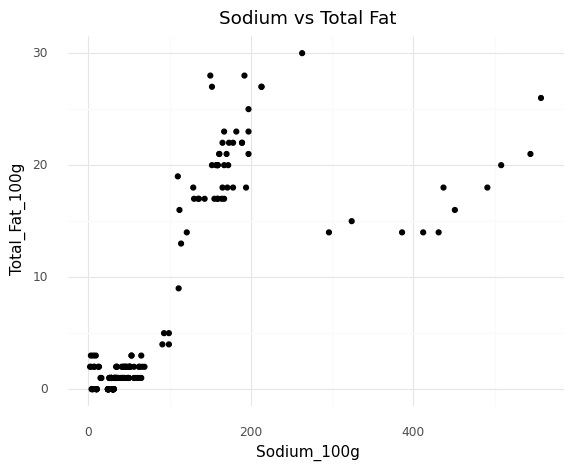

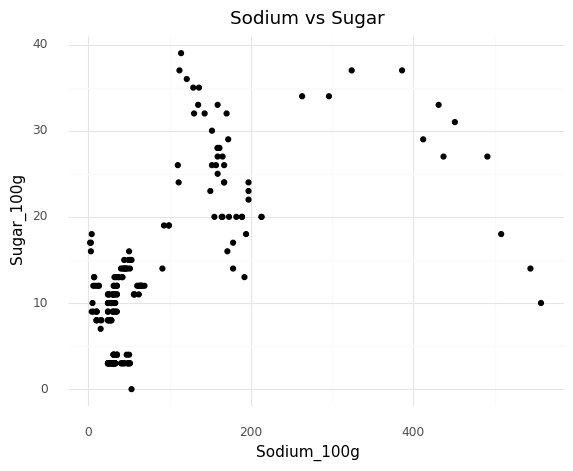

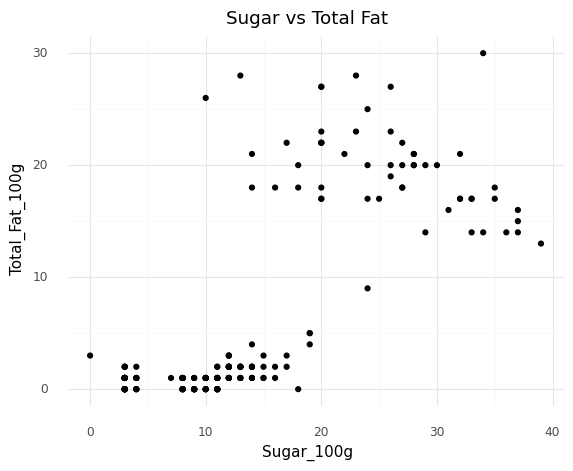

<ggplot: (8793272786342)>

In [ ]:
# A) Make 3 scatterplots using ggplot

# Sodium_100g vs Total_Fat_100g
print((ggplot(donut, aes(x = "Sodium_100g", y = "Total_Fat_100g"))
 + geom_point()
 + theme_minimal()
 +ggtitle("Sodium vs Total Fat")))

# Sodium_100g vs. Sugar_100g
print((ggplot(donut, aes(x = "Sodium_100g", y = "Sugar_100g"))
 + geom_point()
 + theme_minimal()
 +ggtitle("Sodium vs Sugar")))

# Sugar_100g vs Total_Fat_100g
(ggplot(donut, aes(x = "Sugar_100g", y = "Total_Fat_100g"))
 + geom_point()
+ theme_minimal()
+ggtitle("Sugar vs Total Fat"))

# **B).**

For clustering the Krispy Kreme donuts data, I think that **DBSCAN** would be the best method to use. DBSCAN groups points based on their density and has two important parameters, epsilon (the radius of the neighborhood around a point) and minPts (the minimum number of points required to form a dense region). Points that fall within a dense region are considered core points, while points that do not fall within a dense region are considered noise points. This would be the best method for the Krispy Kreme Donuts dataset because DBSCAN has the ability to handle noise and outliers. In this dataset there are outliers that do and do not fit into a clear group, DBSCAN will identify these as noise points and exclude them from the clusters. Another reason is DBSCAN does not assume shape and this is perfect for this dataset becuase there is no clear shape. Which makes it more flexible unlike KMeans, which assumes that clusters are circular in shape. DBSCAN also does not require the number of clusters to be specified beforehand, unlike KMeans. This will be useful in this dataset where the number of clusters is not specifically known.

**Hierarchical Clustering:**

Hierarchical clustering is another option for clustering the Krispy Kreme donuts data. It does not require the number of clusters to be specified beforehand, and it produces a tree-like structure that shows the relationship between the clusters. However, hierarchical clustering can be sensitive to outliers and will not work well on this dataset because there are outliers and there are many variables.

**KMeans:**

KMeans assumes that clusters are spherical and does not do well with noise because it makes sure that each point is in a cluster. With the four steps of grouping it assumes the variance is the same for all points. This can create inaccurate clusters that are over or under assumed. This would not work for this dataset because the clusters are not spherical and assuming they are with KMeans it will classify the donuts inaccurately.

**Gaussian Mixture Models (EM):**

Gaussian Mixture Models (EM) is a probabilistic model that models the underlying distribution of the data using a mixture of Gaussian distributions. This algorithm is useful for modeling data that may have a complex underlying structure, but it is computationally intensive and requires that the number of clusters be specified beforehand. Which would not work well in this dataset becuase the specific clusters can not be identified.

In summary, **DBSCAN** would be the best to use for the Krispy Kreme donuts dataset due to its ability to handle noise and outliers, identify arbitrary-shaped clusters, and not requiring the number of clusters to be specified beforehand.

In [ ]:
# C) Implement the TWO algorithms (1 Best, 1 Worst)

# Z-score

var = ["Sodium_100g", "Total_Fat_100g", "Sugar_100g"]
z = StandardScaler()
donut[var] = z.fit_transform(donut[var])

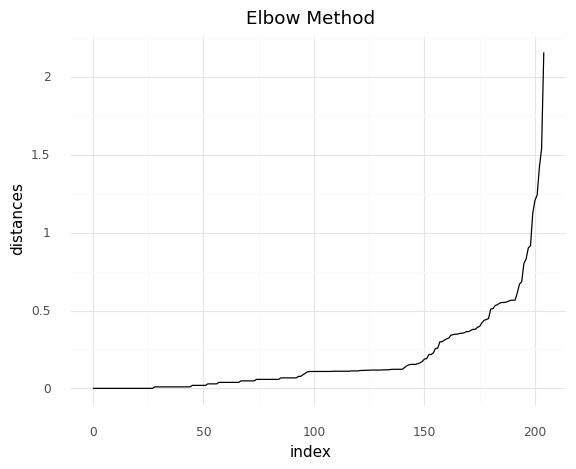


Silhouette Score:  0.7082307909994777


In [ ]:
# DBSCAN (Best)

# Choosing Epsilon

mins = 3
nn = NearestNeighbors(n_neighbors = mins + 1)
nn.fit(donut[var])
distances, neighbors = nn.kneighbors(donut[var])
distances = np.sort(distances[:, mins], axis = 0)

distances_df = pd.DataFrame({"distances":distances,
                             "index": list(range(0, len(distances)))})
print((ggplot(distances_df, aes(x = "index", y = "distances")) + geom_line() + theme_minimal() + labs(title = "Elbow Method")))

# Epsilon should be between 0.5 and 0.6

# DBSCAN
db = DBSCAN(eps = .55, min_samples = 3).fit(donut[var])

labsList = ["Noise"]
labsList = labsList + ["Cluster " + str(i) for i in range(1, len(set(db.labels_)))]
donut["assignments"] = db.labels_

# The Silhouette scores

print("Silhouette Score: ", silhouette_score(donut[var], donut["assignments"]))

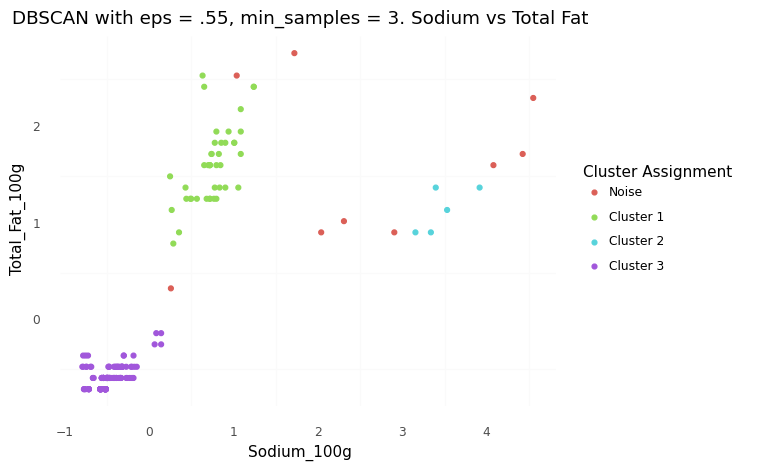

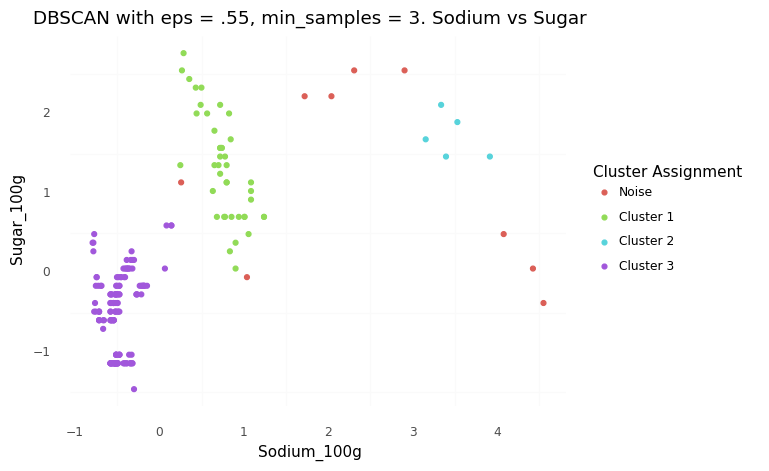

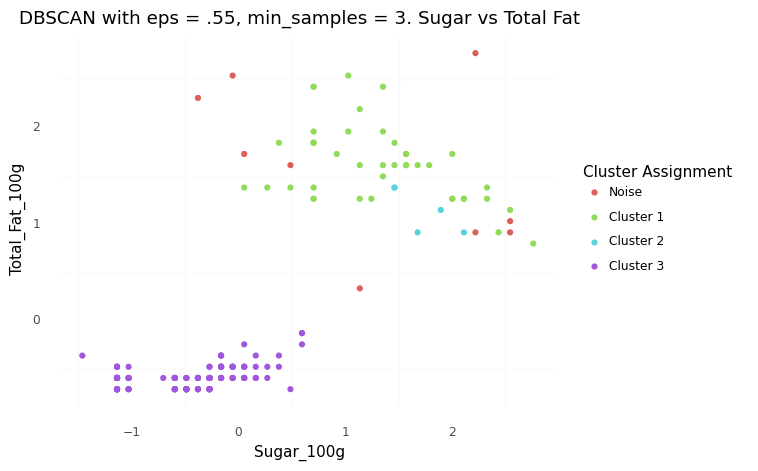

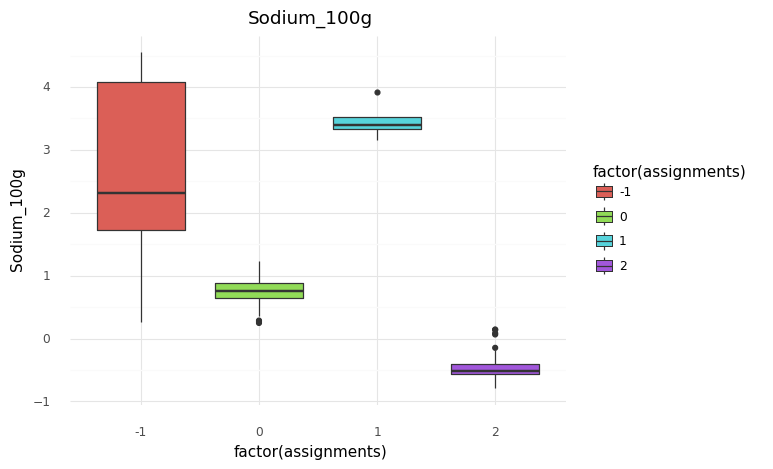

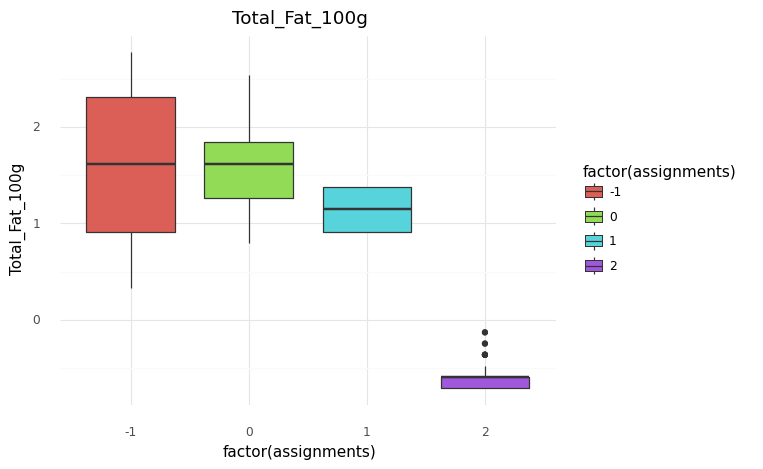

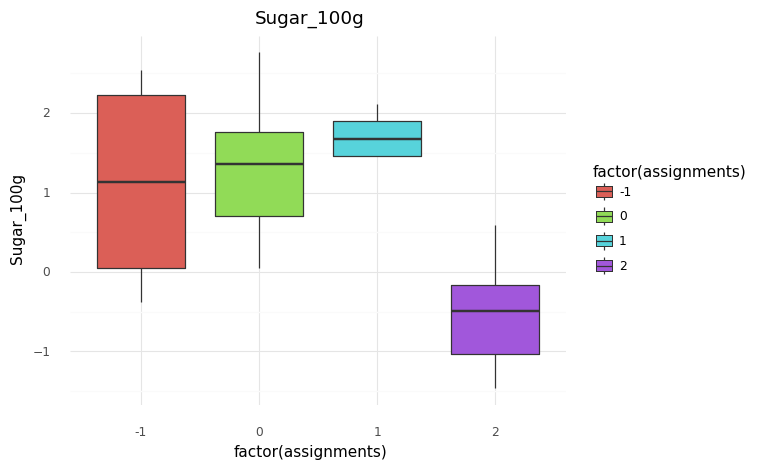

In [ ]:
# DBSCAN Graphs

# Sodium vs total fat
print((ggplot(donut, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = "factor(assignments)"))
 + geom_point()
 + theme_minimal()
 +scale_color_discrete(name = "Cluster Assignment",
                       labels = labsList)
 + theme(panel_grid_major = element_blank())
 +labs(title = "DBSCAN with eps = .55, min_samples = 3. Sodium vs Total Fat")
 ))

# Sodium vs Sugar
print((ggplot(donut, aes(x = "Sodium_100g", y = "Sugar_100g", color = "factor(assignments)"))
 + geom_point()
 + theme_minimal()
 +scale_color_discrete(name = "Cluster Assignment",
                       labels = labsList)
 + theme(panel_grid_major = element_blank())
 +labs(title = "DBSCAN with eps = .55, min_samples = 3. Sodium vs Sugar")
 ))

# Sugar vs total fat
print((ggplot(donut, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = "factor(assignments)"))
 + geom_point()
 + theme_minimal()
 +scale_color_discrete(name = "Cluster Assignment",
                       labels = labsList)
 + theme(panel_grid_major = element_blank())
 +labs(title = "DBSCAN with eps = .55, min_samples = 3. Sugar vs Total Fat")
 ))

# Another interpretation but with boxplots

for p in var:
  print(ggplot(donut, aes(x = "factor(assignments)", y = p, fill = "factor(assignments)"))
  + geom_boxplot() + theme_minimal() + ggtitle(p))


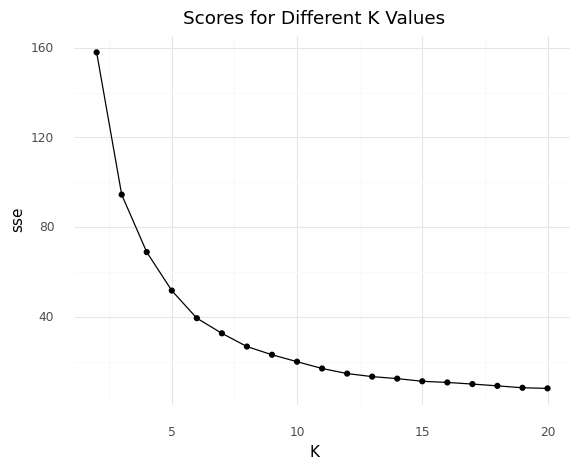

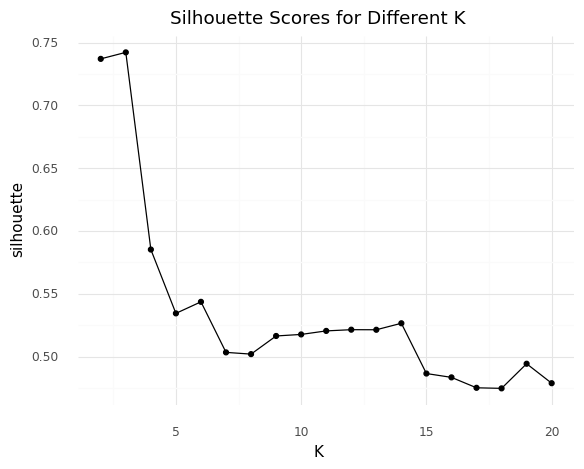


Silhouette score for KMeans clustered variables 0.7422190230687878


In [ ]:
# KMeans (Worst)

# Finding the best K

ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
sse = []
sils = []

for k in ks:
  km = KMeans(n_clusters = k)
  km.fit(donut[var])
  sse.append(km.inertia_)
  sils.append(silhouette_score(donut[var], km.predict(donut[var])))
sse_df = pd.DataFrame({"K":ks, "sse" : sse, "silhouette" : sils})

# Graphing the scores for different K's and graphing silhouette scores for different K values

print((ggplot(sse_df, aes(x = "K", y = "sse")) + geom_point() + geom_line() + theme_minimal() + ggtitle("Scores for Different K Values")))
print((ggplot(sse_df, aes(x = "K", y = "silhouette")) + geom_point() + geom_line() + theme_minimal() + ggtitle("Silhouette Scores for Different K")))

# The best K would be  3

# KMeans model

km = KMeans(n_clusters = 3).fit(donut[var])
membership = km.predict(donut[var])

donut["cluster"] = membership

# The Silhouette score

print("Silhouette score for KMeans clustered variables", silhouette_score(donut[var], membership))

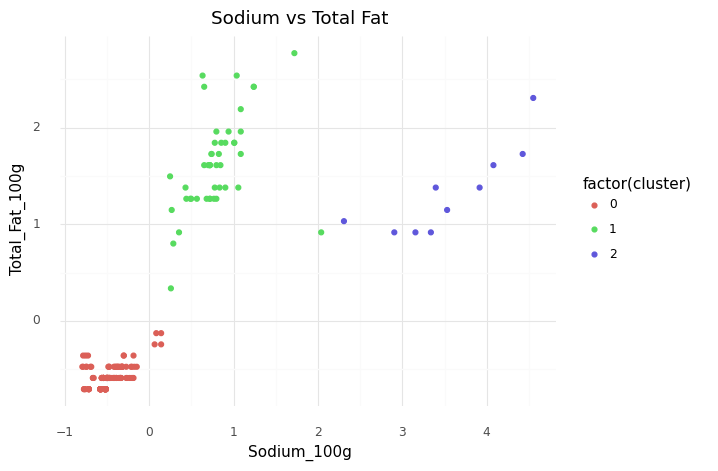

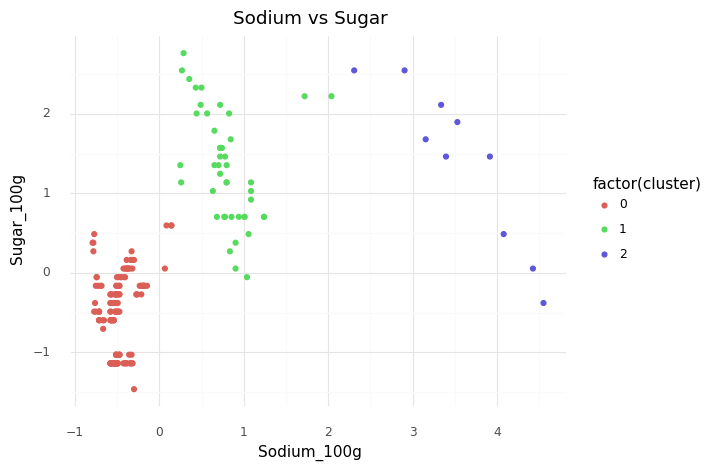

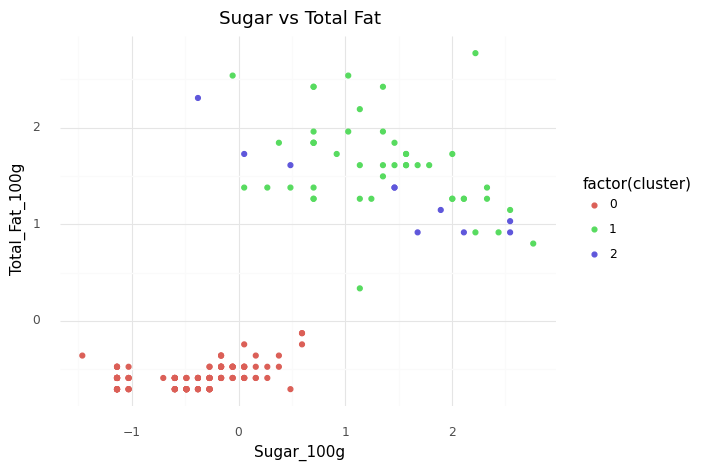

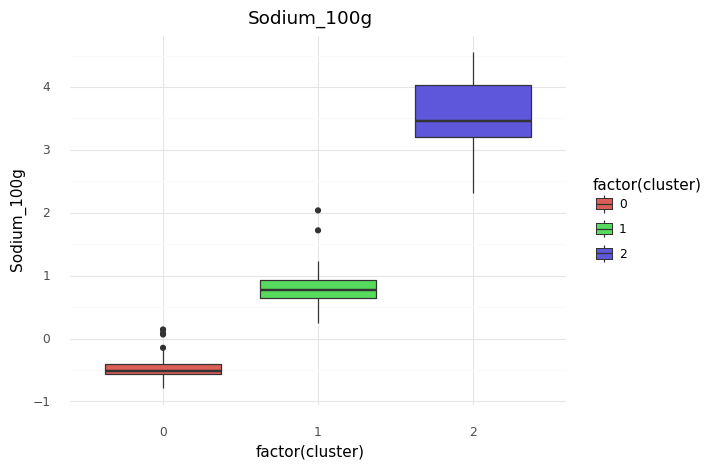

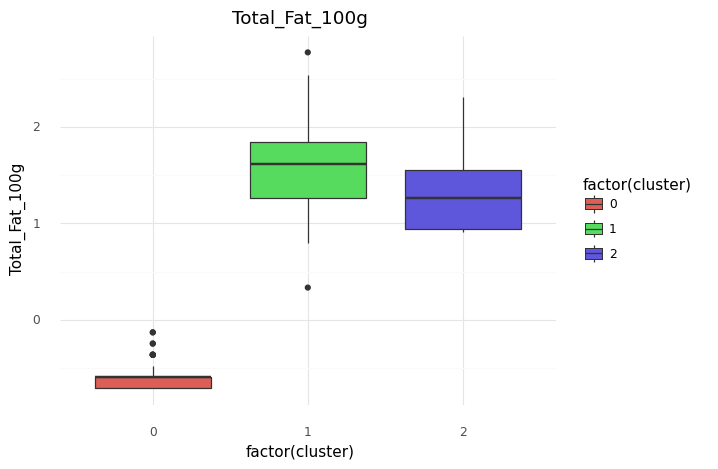

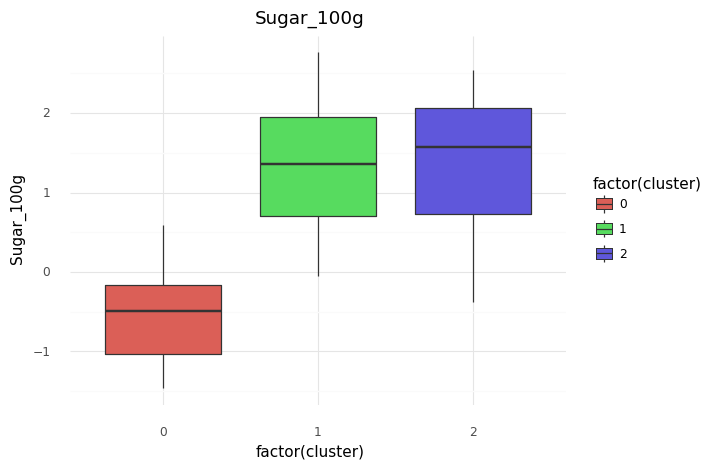

In [ ]:
# KMeans Graphs

# Plotting each of the 3 comparisons

print((ggplot(donut, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = "factor(cluster)"))
 + geom_point() + theme_minimal() + ggtitle("Sodium vs Total Fat")))

print((ggplot(donut, aes(x = "Sodium_100g", y = "Sugar_100g", color = "factor(cluster)"))
 + geom_point() + theme_minimal() + ggtitle("Sodium vs Sugar")))

print((ggplot(donut, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = "factor(cluster)"))
 + geom_point() + theme_minimal() + ggtitle("Sugar vs Total Fat")))


# Another interpretation but with boxplots

for p in var:
  print(ggplot(donut, aes(x = "factor(cluster)", y = p, fill = "factor(cluster)"))
  + geom_boxplot() + theme_minimal() + ggtitle(p))



# **C).**

For the best model, **DBSCAN**, I used the elbow method to choose the paremeter for epslion. From graphing this I was could see that epslion should be about 0.5 to 0.6. From both of those I found that the number between would be the best to use which is 0.55 and this did well. Since there are three groups that are being tested upon the minpts should be around 3 and with testing I found that solid 3 was the best number.

For the worst model, **KMeans**, I used the elbow method here also to choose the number of K. From graphing and pulling silhouette scores I found that the best K to use was also 3. Which makes sense because we are still using three groups to test on.

# **D).**

DBSCAN:

The best clustering model that I used was **DBSCAN**. I calculated the silhouette scores as well as assessing and examining the graphs with the color coded clusters. The overall silhouette score was around 0.708. Because of the properties of DBSCAN, this is one of the downfalls of this clustering algorithm because it includes all the points, even the noise not included in clusters. Another reason is becuase each cluster is not the same size and minpts has to be assumed and could be in favor of one cluster over the other.

For each cluster, here are my interpretations and the characteristics.

**Cluster 1:** High fat, high sugar, and medium sodium; This is probably a sugary and fatty donut like a filled jelly donut.

**Cluster 2:** High sodium, medium fat, high sugar; This is probably a bacon donut on it, or a salted caramel donut.

**Cluster 3:** Low fat, low sodium, low/medium sugar: This is probably a healthier one like a normal glazed or powdered or unglazed donut.

KMEANS:

For the worst clustering model I used **KMeans**. It has the highest silhouette score of 0.7422, however, the clusters that it made for each point did not represent the data well enough due to the clustering properties of the model. KMeans does create clusters that are visually correct, however when examining them they are not. KMeans is creating a huge wide cluster which does not help draw conclusions and makes the conclusion very vague.

For each cluster, here are my interpretations and its characteristics:

**Cluster 1:** Low fat, low sodium, low sugar: This is probably a healthy donut like an unglazed plain donut.

**Cluster 2:** High sugar, high fat, medium sodium: This is probably an unhealthy donut like a filled jelly donut.

**Cluster 3:** Low fat, low sodium, medium sugar: this is probably another healthy donut but with a bit more sugar like a powdered donut.

As you can see cluster 1, 2, 3 from DBSCAN is very different from cluster 1,2,3 from KMeans.

**Cluster 1:** DBSCAN: Jelly Filled Donut vs. KMeans: Plain Donut

**Cluster 2:** DBSCAN: Salted Caramel Donut vs. KMeans: Jelly filled Donut

**Cluster 3:** DBSCAN: Plain Donut vs. KMeans: Powdered Donut

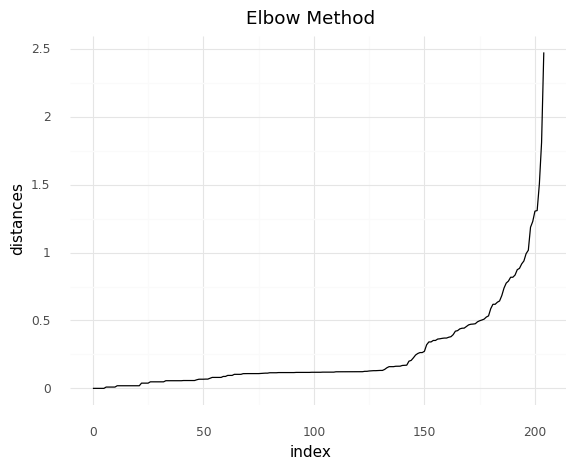


Overall Silhouette Score:  0.698579911991358


In [ ]:
# E) Choose ONE other of the _100g variables from the data set to add to your clustering model to improve it.
# Choosing Carbs

# Add to DBSCAN & Z-score new variable

var = ["Sodium_100g", "Sugar_100g", "Total_Fat_100g", "Carbohydrates_100g"]
donut["Carbohydrates_100g"] = z.fit_transform(donut[["Carbohydrates_100g"]])

# Choosing Esplion

mins = 4
nn = NearestNeighbors(n_neighbors = mins + 1)
nn.fit(donut[var])
distances, neighbors = nn.kneighbors(donut[var])
distances = np.sort(distances[:, mins], axis = 0)

distances_df = pd.DataFrame({"distances":distances,
                             "index": list(range(0, len(distances)))})
print((ggplot(distances_df, aes(x = "index", y = "distances")) + geom_line() + theme_minimal() + labs(title = "Elbow Method")))

# Epslion can be between 0.5 and 0.6

# DBSCAN

db = DBSCAN(eps = .6, min_samples = 4).fit(donut[var])

labsList = ["Noise"]
labsList = labsList + ["Cluster " + str(i) for i in range(1, len(set(db.labels_)))]
donut["assignments"] = db.labels_

# The Silhouette score

print("Overall Silhouette Score: ", silhouette_score(donut[var], donut["assignments"]))

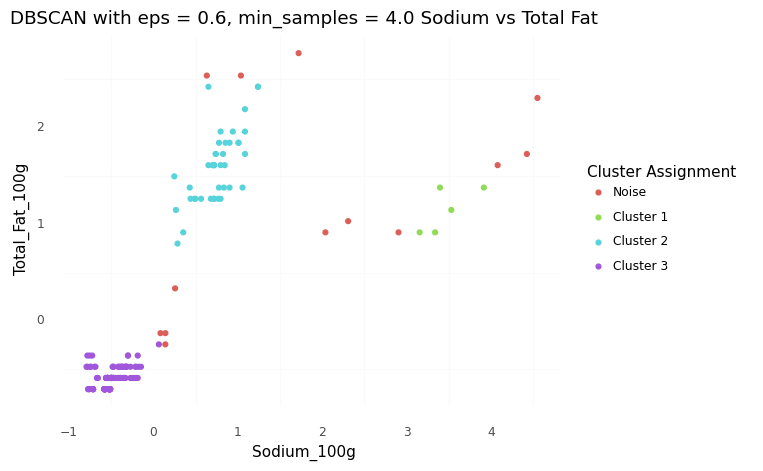

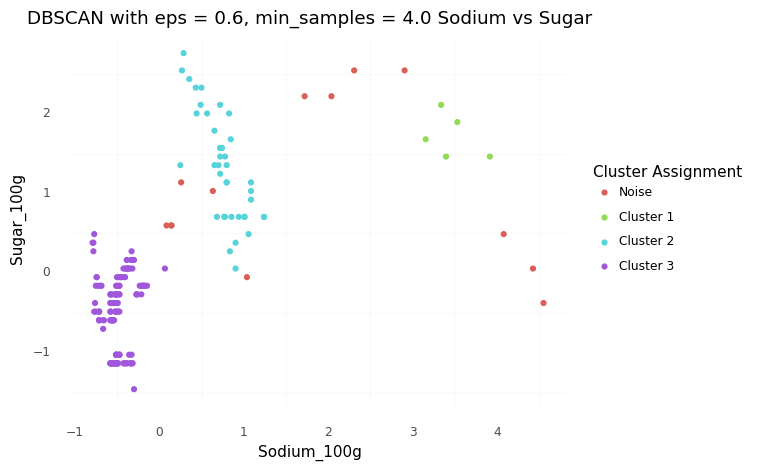

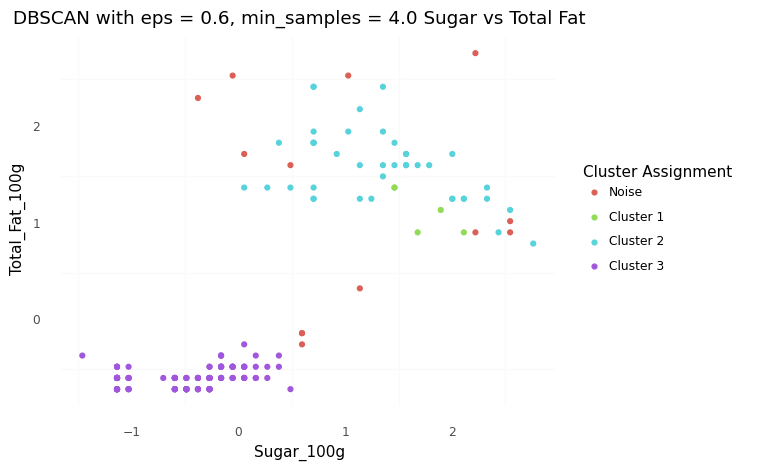

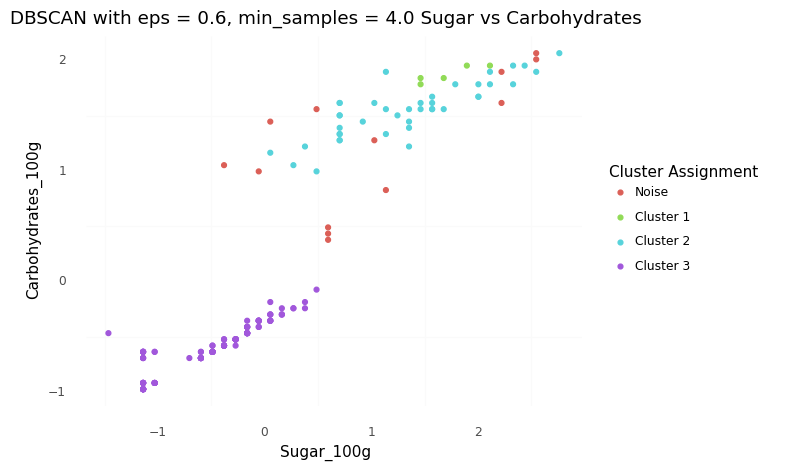

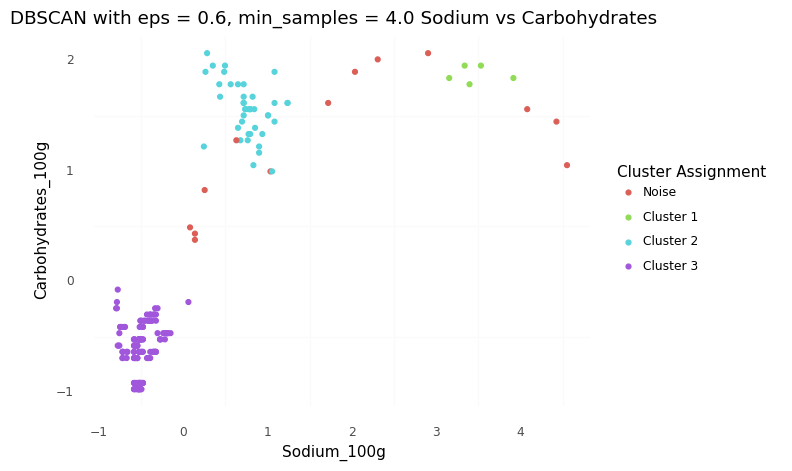

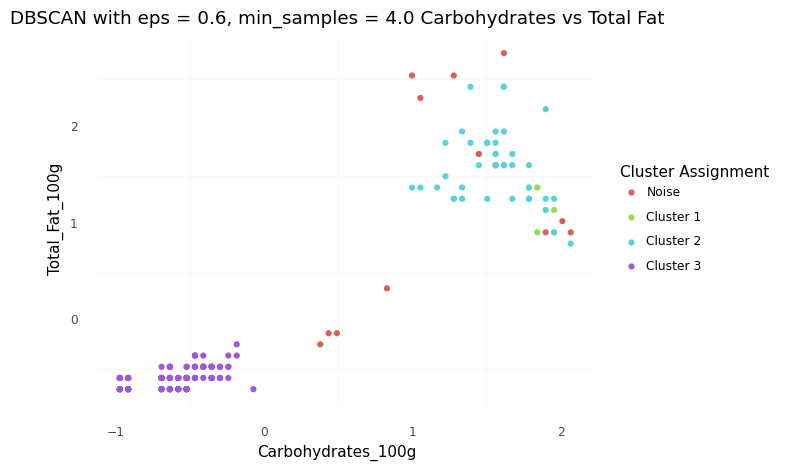

In [ ]:
# Graphs with color coded cluster assignments

# Sodium vs total fat
print((ggplot(donut, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = "factor(assignments)"))
 + geom_point()
 + theme_minimal()
 +scale_color_discrete(name = "Cluster Assignment",
                       labels = labsList)
 + theme(panel_grid_major = element_blank())
 +labs(title = "DBSCAN with eps = 0.6, min_samples = 4.0 Sodium vs Total Fat")
 ))

# Sodium vs Sugar
print((ggplot(donut, aes(x = "Sodium_100g", y = "Sugar_100g", color = "factor(assignments)"))
 + geom_point()
 + theme_minimal()
 +scale_color_discrete(name = "Cluster Assignment",
                       labels = labsList)
 + theme(panel_grid_major = element_blank())
 +labs(title = "DBSCAN with eps = 0.6, min_samples = 4.0 Sodium vs Sugar")
 ))

# Sugar vs total fat
print((ggplot(donut, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = "factor(assignments)"))
 + geom_point()
 + theme_minimal()
 +scale_color_discrete(name = "Cluster Assignment",
                       labels = labsList)
 + theme(panel_grid_major = element_blank())
 +labs(title = "DBSCAN with eps = 0.6, min_samples = 4.0 Sugar vs Total Fat")
 ))

# Sugar and Carbohydrates
print((ggplot(donut, aes(x = "Sugar_100g", y = "Carbohydrates_100g", color = "factor(assignments)"))
 + geom_point()
 + theme_minimal()
 +scale_color_discrete(name = "Cluster Assignment",
                       labels = labsList)
 + theme(panel_grid_major = element_blank())
 +labs(title = "DBSCAN with eps = 0.6, min_samples = 4.0 Sugar vs Carbohydrates")
 ))

# Sodium and Carbohydrates
print((ggplot(donut, aes(x = "Sodium_100g", y = "Carbohydrates_100g", color = "factor(assignments)"))
 + geom_point()
 + theme_minimal()
 +scale_color_discrete(name = "Cluster Assignment",
                       labels = labsList)
 + theme(panel_grid_major = element_blank())
 +labs(title = "DBSCAN with eps = 0.6, min_samples = 4.0 Sodium vs Carbohydrates")
 ))

# Carbohydrates and Total Fat
print((ggplot(donut, aes(x = "Carbohydrates_100g", y = "Total_Fat_100g", color = "factor(assignments)"))
 + geom_point()
 + theme_minimal()
 +scale_color_discrete(name = "Cluster Assignment",
                       labels = labsList)
 + theme(panel_grid_major = element_blank())
 +labs(title = "DBSCAN with eps = 0.6, min_samples = 4.0 Carbohydrates vs Total Fat")
 ))


# **E).**

Based on my understanding of donuts, I decided to incorporate carbohydrates into my clustering model. Donuts are known as a sweet like ice cream or candy and the primary concern from those sweets are carbs so it would only make sense to fit it into the model. Donuts consist primarily of doughy material, so I added this important ingredient to enhance the performance of the model. When running the model with carbohydrates included, I observed a noticeable improvement.

Although the overall silhouette score decreased slightly from 0.708 to 0.6985, this metric is not a reliable indicator of cohesion and separation due to the characteristics of DBSCAN. However, when examining the clusters visually, the addition of carbohydrates resulted in more coherent and sensible groupings, with a total of three clusters.

Overall, the inclusion of carbohydrates enhanced the fit of my clustering model. Through analyzing both the graphs and individual silhouette scores, it is clear that the clustering model has improved.

Here are the characteristics of each cluster and its type of donut:

**Cluster 1:** Medium fat, high sodium, high sugar, high carbs: Unhealthy donut like a Bacon Donut

**Cluster 2:** High fat, medium sodium, high sugar, high carbs: Unhealthy donut like a salted caramel donut

**Cluster 3:** Low fat, low sodium, low sugar, low carbs: Healthy donut like a keto donut or a low calorie donut

In [ ]:
!pip install gwpy &> /dev/null

!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

!pip install pypandoc

from google.colab import drive
drive.mount('/content/drive')

!cp "drive/My Drive/Colab Notebooks/Project2_Laymoni_Morrison.ipynb" ./

!jupyter nbconvert --to PDF "Project2_Laymoni_Morrison.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
texlive is already the newest version (2019.20200218-1).
texlive-latex-extra is already the newest version (2019.202000218-1).
texlive-xetex is already the newest version (2019.20200218-1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Get:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/graphic